## Feature Extraction for Convolutional-Autoencoder 

Con los datos generados en 1.0, separamos en conjuntos de entrenamiento y testeo, y probamos tres normalizaciones distintas.

Luego visualizamos la distribución de los datos bajo cada una de las normalizaciones realizadas. 

Comenzamos importando los módulos necesarios y cargando los datos crudos.

In [1]:
import os

from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from deep_scattering_models.data.create_data import load_data

from deep_scattering_models.visualization.visualize import plot_polarization_signature, plot_histogram

from deep_scattering_models.features.preprocess_data import to_dB, RScaler, MMScaler


In [2]:
file_name = "spm_signatures_no_noise"
data = load_data(file_name)

Los datos reales, generalmente están en escala de decibeles, por lo que antes de separar los datos en conjuntos de entrenamiento y testeo, y de normalizarlos, los pasamos a ésta escala. 

Al realizar esta operación _element wise_, no estamos generando un flujo de información entre el conjunto de testeo y el de entrenamiento, así que podemos realizarla de forma segura antes de separar.

In [3]:
data_dB = to_dB(data)

### 1 - Train-Test split y Robust Scaler

Comenzamos separando en grupos de entrenamiento y testeo, para luego estandarizar los datos. En el estandarizado robusto, se resta la media de de todos los pixels, y se divide por el interquartile rate.

In [4]:
train_set, test_set = train_test_split(
    data_dB, 
    test_size=.2, 
    random_state=123
    )

print(f'Tamaño de los datos de entrenamiento: {train_set.shape}')
print(f'Tamaño de los datos de testeo: {test_set.shape}')

Tamaño de los datos de entrenamiento: (16384, 45, 90)
Tamaño de los datos de testeo: (4096, 45, 90)


In [5]:
# Fiteo con el conjunto de entrenamiento
robust_scaler = RScaler().fit(train_set)

# Transformo ambos conjuntos
rscaled_train = robust_scaler.transform(train_set)
rscaled_test = robust_scaler.transform(test_set)

In [16]:
print(f"Conjunto de entrenamiento: mean={np.mean(rscaled_train)}, dev={np.std(rscaled_train)}")
print(f"Conjunto de testeo: mean={np.mean(rscaled_test)}, dev={np.std(rscaled_test)}")

Conjunto de entrenamiento: mean=0.08203492772001762, dev=1.5668368845700265
Conjunto de testeo: mean=0.07927240724948349, dev=1.5085925801924673


Tomemos algún ejemplo al azar del conjunto de entrenamiento y visualicémoslo

<AxesSubplot:title={'center':'$\\sigma(\\psi,\\chi)$'}, xlabel='Orientation Angle $\\psi$ [°]', ylabel='Ellipticity Angle $\\chi$ [°]'>

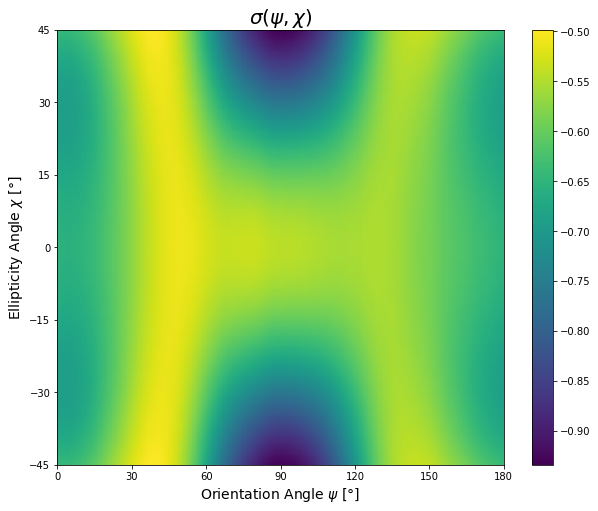

In [18]:
# Elegimos ana firma al azar
rng = np.random.default_rng()
rnd_index = rng.integers(rscaled_train.shape[0])
rnd_signature = rscaled_train[rnd_index, :, :]

# Ploteamos
plot_polarization_signature(rnd_signature)

Veamos un histograma de los conjuntos de entrenamiento y testeo

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

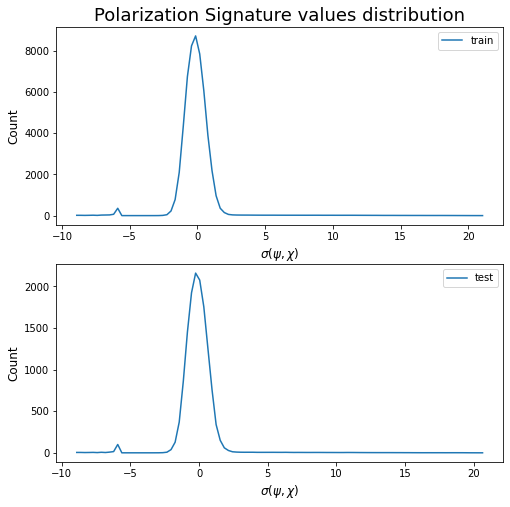

In [31]:
# Rango de valores válidos para los histogramas
train_range = np.min(rscaled_train), np.max(rscaled_train) 
test_range = np.min(rscaled_test), np.max(rscaled_test)

fig, ax1 = plt.subplots(2, 1, figsize=(20, 10))
plot_histogram(
    rscaled_train, 
    ax=ax1[0], 
    n_bins=100,
    hist_kw={'range' : train_range, 'density' : True}, 
    plot_kw={'label' : 'train'}
    )
plot_histogram(
    rscaled_test, 
    ax=ax1[1],
    n_bins=100, 
    hist_kw={'range' : test_range, 'density' : True}, 
    plot_kw={'label' : 'test'}
    )

ax1[1].set_title('')
for ax in ax1:
    ax.legend()

plt.tight_layout   

### 2 -  Minmax Scaler

En vez de estandarizar los datos, probamos normalizarlos: los llevamos al intervalo $[0, 1]$.

In [32]:
# Fiteo con el conjunto de entrenamiento
minmax_scaler = MMScaler().fit(train_set)

# Transformo ambos conjuntos
mscaled_train = minmax_scaler.transform(train_set)
mscaled_test = minmax_scaler.transform(test_set)

In [33]:
print(f"Conjunto de entrenamiento: mean={np.mean(mscaled_train)}, dev={np.std(mscaled_train)}")
print(f"Conjunto de testeo: mean={np.mean(mscaled_test)}, dev={np.std(mscaled_test)}")

Conjunto de entrenamiento: mean=0.3044870044513574, dev=0.06693855459040325
Conjunto de testeo: mean=0.3044169506912544, dev=0.0648067216349647


<AxesSubplot:title={'center':'$\\sigma(\\psi,\\chi)$'}, xlabel='Orientation Angle $\\psi$ [°]', ylabel='Ellipticity Angle $\\chi$ [°]'>

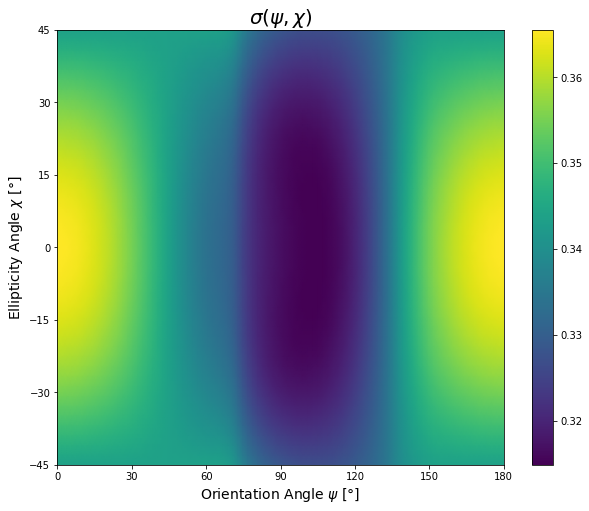

In [34]:
# Elegimos ana firma al azar
rng = np.random.default_rng()
rnd_index = rng.integers(mscaled_train.shape[0])
rnd_signature = mscaled_train[rnd_index, :, :]

# Ploteamos
plot_polarization_signature(rnd_signature)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

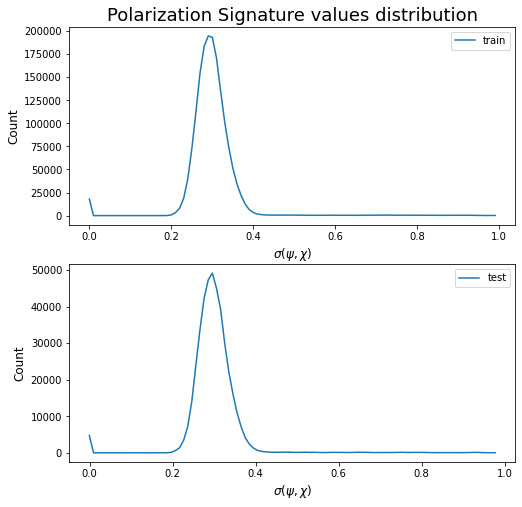

In [35]:
# Rango de valores válidos para los histogramas
train_range = np.min(mscaled_train), np.max(mscaled_train) 
test_range = np.min(mscaled_test), np.max(mscaled_test)

fig, ax1 = plt.subplots(2, 1, figsize=(20, 10))
plot_histogram(
    mscaled_train, 
    ax=ax1[0], 
    n_bins=100,
    hist_kw={'range' : train_range, 'density' : True}, 
    plot_kw={'label' : 'train'}
    )
plot_histogram(
    mscaled_test, 
    ax=ax1[1],
    n_bins=100, 
    hist_kw={'range' : test_range, 'density' : True}, 
    plot_kw={'label' : 'test'}
    )

ax1[1].set_title('')
for ax in ax1:
    ax.legend()

plt.tight_layout   